# [NTDS'19] assignment 1: network science
[ntds'19]: https://github.com/mdeff/ntds_2019

[Eda Bayram](https://lts4.epfl.ch/bayram), [EPFL LTS4](https://lts4.epfl.ch) and
[Nikolaos Karalias](https://people.epfl.ch/nikolaos.karalias), [EPFL LTS2](https://lts2.epfl.ch).

## Students

* Team: 26
* Students: Yawen Hou, Peilin Kang, Yueran Liang, Zhechen Su

## Rules

Grading:
* The first deadline is for individual submissions. The second deadline is for the team submission.
* All team members will receive the same grade based on the team solution submitted on the second deadline.
* As a fallback, a team can ask for individual grading. In that case, solutions submitted on the first deadline are graded.
* Collaboration between team members is encouraged. No collaboration between teams is allowed.

Submission:
* Textual answers shall be short. Typically one to two sentences.
* Code has to be clean.
* You cannot import any other library than we imported.
  Note that Networkx is imported in the second section and cannot be used in the first.
* When submitting, the notebook is executed and the results are stored. I.e., if you open the notebook again it should show numerical results and plots. We won't be able to execute your notebooks.
* The notebook is re-executed from a blank state before submission. That is to be sure it is reproducible. You can click "Kernel" then "Restart Kernel and Run All Cells" in Jupyter.

## Objective

The purpose of this milestone is to explore a given dataset, represent it by network by constructing different graphs. In the first section, you will analyze the network properties. In the second section, you will explore various network models and find out the network model fitting the ones you construct from the dataset.

## Cora Dataset

The [Cora dataset](https://linqs.soe.ucsc.edu/node/236) consists of scientific publications classified into one of seven research fields. 

* **Citation graph:** the citation network can be constructed from the connections given in the `cora.cites` file.
* **Feature graph:** each publication in the dataset is described by a 0/1-valued word vector indicating the absence/presence of the corresponding word from the dictionary and its research field, given in the `cora.content` file. The dictionary consists of 1433 unique words. A feature graph can be constructed using the Euclidean distance between the feature vector of the publications.

The [`README`](data/cora/README) provides details about the content of [`cora.cites`](data/cora/cora.cites) and [`cora.content`](data/cora/cora.content).

## Section 1: Network Properties

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

### Question 1: Construct a Citation Graph and a Feature Graph

Read the `cora.content` file into a Pandas DataFrame by setting a header for the column names. Check the `README` file.

In [3]:
column_list = ["paper_id"] + ["word_attributes_" + str(i) for i in range(1433)] + ["class_label"] # Your code here.
pd_content = pd.read_csv('data/cora/cora.content', delimiter='\t', names=column_list) 
pd_content.head()

,paper_id,word_attributes_0,word_attributes_1,word_attributes_2,word_attributes_3,word_attributes_4,word_attributes_5,word_attributes_6,word_attributes_7,word_attributes_8,...,word_attributes_1424,word_attributes_1425,word_attributes_1426,word_attributes_1427,word_attributes_1428,word_attributes_1429,word_attributes_1430,word_attributes_1431,word_attributes_1432,class_label
0,31336,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Neural_Networks
1,1061127,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Rule_Learning
2,1106406,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
3,13195,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
4,37879,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Probabilistic_Methods


Print out the number of papers contained in each of the reasearch fields.

**Hint:** You can use the `value_counts()` function.

In [4]:
pd_content["class_label"].value_counts()# Your code here.

Neural_Networks           818
Probabilistic_Methods     426
Genetic_Algorithms        418
Theory                    351
Case_Based                298
Reinforcement_Learning    217
Rule_Learning             180
Name: class_label, dtype: int64

Select all papers from a field of your choice and store their feature vectors into a NumPy array.
Check its shape.

In [5]:
my_field = "Reinforcement_Learning"# Your code here.
features = pd_content[pd_content["class_label"] == my_field][pd_content.columns[1:1434]].values# Your code here.
features.shape

(217, 1433)

Let $D$ be the Euclidean distance matrix whose $(i,j)$ entry corresponds to the Euclidean distance between feature vectors $i$ and $j$.
Using the feature vectors of the papers from the field which you have selected, construct $D$ as a Numpy array. 

In [6]:
p = np.expand_dims(features, 0)  # (1, 217, 1433)
q = np.expand_dims(features, 1)  # (217, 1, 1433)
distance = np.sqrt(np.sum((p - q)**2, 2)) # (217, 217, 1433)
distance.shape

(217, 217)

Check the mean pairwise distance $\mathbb{E}[D]$.

In [7]:
mean_distance = distance.mean()
mean_distance

5.781074820974051

Plot an histogram of the euclidean distances.

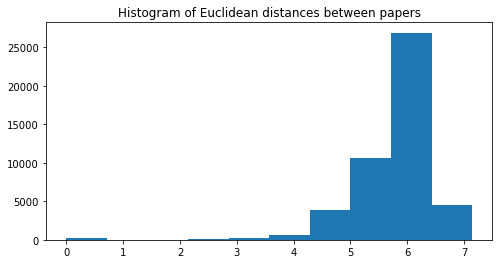

In [78]:
plt.figure(1, figsize=(8, 4))
plt.title("Histogram of Euclidean distances between papers")
plt.hist(distance.flatten());

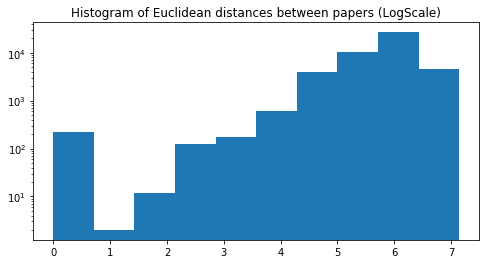

In [79]:
plt.figure(1, figsize=(8, 4))
plt.title("Histogram of Euclidean distances between papers (LogScale)")
plt.hist(distance.flatten(), log=True);

Now create an adjacency matrix for the papers by thresholding the Euclidean distance matrix.
The resulting (unweighted) adjacency matrix should have entries
$$ A_{ij} = \begin{cases} 1, \; \text{if} \; d(i,j)< \mathbb{E}[D], \; i \neq j, \\ 0, \; \text{otherwise.} \end{cases} $$

First, let us choose the mean distance as the threshold.

In [10]:
threshold = mean_distance
A_feature = distance.copy()
A_feature[distance>=threshold] = 0
A_feature[distance<threshold] = 1# Your code here.
A_feature = A_feature - np.diag(np.diag(A_feature))

Now read the `cora.cites` file and construct the citation graph by converting the given citation connections into an adjacency matrix.

In [82]:
cora_cites = np.genfromtxt('data/cora/cora.cites', delimiter='\t')
A_citation = np.zeros((pd_content.shape[0],pd_content.shape[0]))
for pair in cora_cites:
    A_citation[pd_content[pd_content["paper_id"]==int(pair[1])].index[0], pd_content[pd_content["paper_id"]==int(pair[0])].index[0]] = 1 
A_citation.shape

(2708, 2708)

Get the adjacency matrix of the citation graph for the field that you chose.
You have to appropriately reduce the adjacency matrix of the citation graph.

In [12]:
# Your code here.
ind = pd_content.index[pd_content.class_label=="Reinforcement_Learning"]
A_citation = A_citation[ind][:,ind]

Check if your adjacency matrix is symmetric. Symmetrize your final adjacency matrix if it's not already symmetric.

In [13]:
# Your code here.
A_citation = np.maximum( A_citation, A_citation.transpose() )
np.count_nonzero(A_citation - A_citation.transpose())

0

Check the shape of your adjacency matrix again.

In [14]:
A_citation.shape

(217, 217)

### Question 2: Degree Distribution and Moments

What is the total number of edges in each graph?

In [15]:
num_edges_feature = A_feature.sum()/2# Your code here.
num_edges_citation = A_citation.sum()/2# Your code here.
print(f"Number of edges in the feature graph: {num_edges_feature}")
print(f"Number of edges in the citation graph: {num_edges_citation}")

Number of edges in the feature graph: 8945.0
Number of edges in the citation graph: 409.0


Plot the degree distribution histogram for each of the graphs.

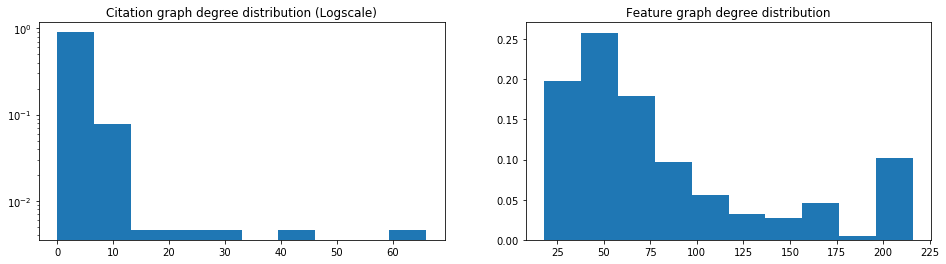

In [16]:
degrees_citation = A_citation.sum(axis=0)# Your code here.
degrees_feature = A_feature.sum(axis=0)# Your code here.

deg_hist_normalization = np.ones(degrees_citation.shape[0]) / degrees_citation.shape[0]

fig, axes = plt.subplots(1, 2, figsize=(16, 4))
axes[0].set_title('Citation graph degree distribution (Logscale)')
axes[0].hist(degrees_citation, weights=deg_hist_normalization, log=True);
axes[1].set_title('Feature graph degree distribution')
axes[1].hist(degrees_feature, weights=deg_hist_normalization);

Calculate the first and second moments of the degree distribution of each graph.

In [81]:
cit_moment_1 = degrees_citation.sum()/len(degrees_citation)# Your code here.
cit_moment_2 = (degrees_citation**2).sum()/len(degrees_citation)# Your code here.

feat_moment_1 = degrees_feature.sum()/len(degrees_feature)# Your code here.
feat_moment_2 = (degrees_feature**2).sum()/len(degrees_feature)# Your code here.

print(f"1st moment of citation graph: {cit_moment_1}")
print(f"2nd moment of citation graph: {cit_moment_2}")
print(f"1st moment of feature graph: {feat_moment_1}")
print(f"2nd moment of feature graph: {feat_moment_2}")

1st moment of citation graph: 3.769585253456221
2nd moment of citation graph: 48.516129032258064
1st moment of feature graph: 82.44239631336406
2nd moment of feature graph: 10071.456221198157


What information do the moments provide you about the graphs?
Explain the differences in moments between graphs by comparing their degree distributions.

**Your answer here:**

Mean can be represented as the 1st moment. It is the center of mass of the distribution.

Variance can be represented as the the 2nd central moment. Interpreted as representing the degree to which the distribution of 𝑋 is spread out.

Like what we see in the citation number histogram before, more than 80% percent of vertices have degree between 0-5, which means their mean is low. And since the degree number does not flucate, the 2nd moment is also low as the variance.

On the contrary, the feature graph has lots of connection. Thus, the distribution is between 20 to 225, and it leads to the high 1st moment. Also, we can see there is an obvious change, which contributes to its high variance veryly.

Select the 20 largest hubs for each of the graphs and remove them. Observe the sparsity pattern of the adjacency matrices of the citation and feature graphs before and after such a reduction.

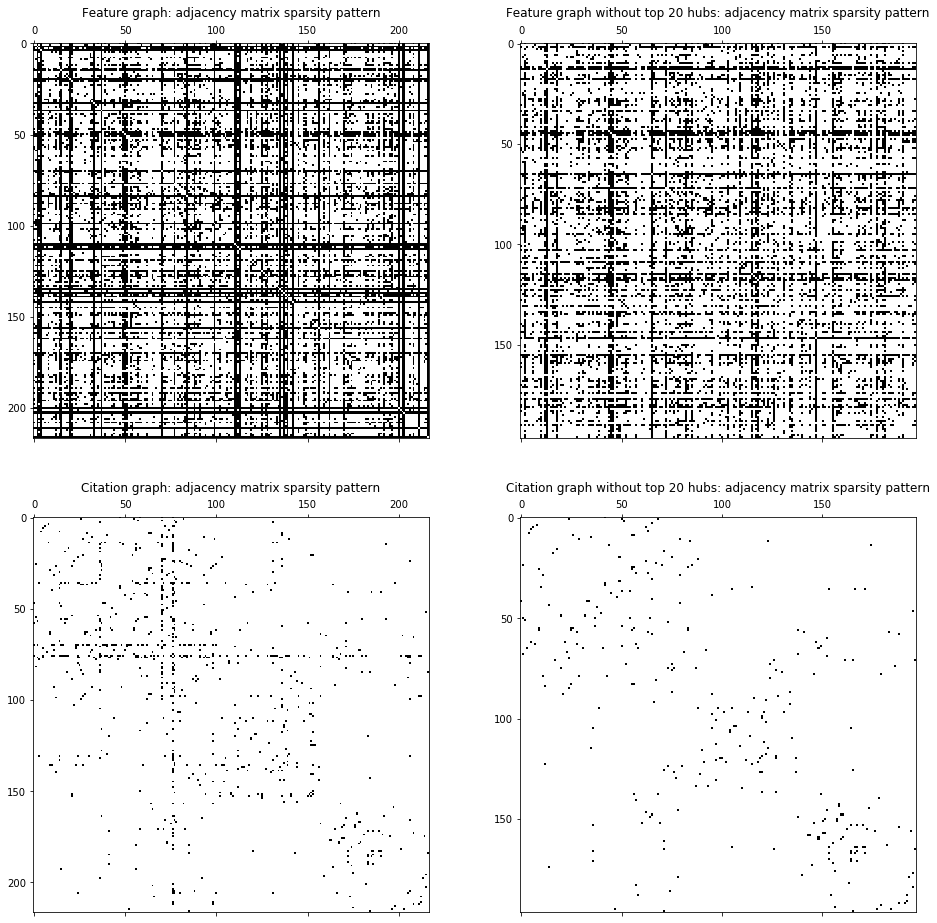

In [18]:
ind = degrees_feature.argsort()[-20:][::-1]
reduced_A_feature = np.delete(np.delete(A_feature ,ind , axis=1) ,ind , axis=0)# Your code here

ind = degrees_citation.argsort()[-20:][::-1]
reduced_A_citation = np.delete(np.delete(A_citation ,ind , axis=1) ,ind , axis=0)# Your code here

fig, axes = plt.subplots(2, 2, figsize=(16, 16))
axes[0, 0].set_title('Feature graph: adjacency matrix sparsity pattern')
axes[0, 0].spy(A_feature);
axes[0, 1].set_title('Feature graph without top 20 hubs: adjacency matrix sparsity pattern')
axes[0, 1].spy(reduced_A_feature);
axes[1, 0].set_title('Citation graph: adjacency matrix sparsity pattern')
axes[1, 0].spy(A_citation);
axes[1, 1].set_title('Citation graph without top 20 hubs: adjacency matrix sparsity pattern')
axes[1, 1].spy(reduced_A_citation);

Plot the new degree distribution histograms.

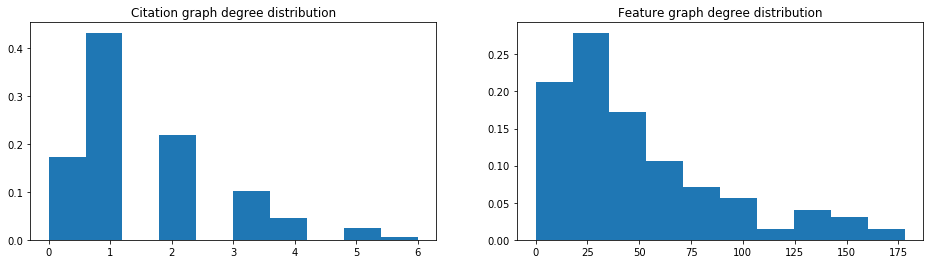

In [19]:
reduced_degrees_feat = reduced_A_feature.sum(axis=0) # Your code here.
reduced_degrees_cit = reduced_A_citation.sum(axis=0)# Your code here.

deg_hist_normalization = np.ones(reduced_degrees_feat.shape[0])/reduced_degrees_feat.shape[0]

fig, axes = plt.subplots(1, 2, figsize=(16, 4))
axes[0].set_title('Citation graph degree distribution')
axes[0].hist(reduced_degrees_cit, weights=deg_hist_normalization);
axes[1].set_title('Feature graph degree distribution')
axes[1].hist(reduced_degrees_feat, weights=deg_hist_normalization);

Compute the first and second moments for the new graphs.

In [20]:
reduced_cit_moment_1 = reduced_degrees_cit.sum()/len(reduced_degrees_cit)# Your code here.
reduced_cit_moment_2 = (reduced_degrees_cit**2).sum()/len(reduced_degrees_cit)# Your code here.

reduced_feat_moment_1 = reduced_degrees_feat.sum()/len(reduced_degrees_feat)# Your code here.
reduced_feat_moment_2 = (reduced_degrees_feat**2).sum()/len(reduced_degrees_feat)# Your code here.


print("Citation graph first moment:", reduced_cit_moment_1)
print("Citation graph second moment:", reduced_cit_moment_2)
print("Feature graph first moment: ", reduced_feat_moment_1)
print("Feature graph second moment: ", reduced_feat_moment_2)

Citation graph first moment: 1.5126903553299493
Citation graph second moment: 3.766497461928934
Feature graph first moment:  49.15736040609137
Feature graph second moment:  4056.1015228426395


Print the number of edges in the reduced graphs.

In [21]:
print("The edge number of reduced citation is ", reduced_A_citation.sum() / 2)
print("The edge number of reduced feature is ", reduced_A_feature.sum() / 2) # Your code here


The edge number of reduced citation is  149.0
The edge number of reduced feature is  4842.0


Is the effect of removing the hubs the same for both networks? Look at the percentage changes for each moment. Which of the moments is affected the most and in which graph? Explain why.  

**Hint:** Examine the degree distributions.

**Your answer here:**

1st moment in reduced citation graph decreases 59% comparing to original, whereas that of feature graph decreases 39%.
2nd moment in reduced citaion graph decreases more than 90%, whereas that of feature graph decreases 60%

So, we can draw conclusion that removing hubs influence citation(small networks) more than feature (big networks). The possible explaination could be network size decides its steady ability. If the network is small and we remove some extreme hubs, the changed value could be a big part of the whole status. Thus, there is a big change. On the other hand, big network weight each vertices more evenly, so removing or adding could not have huge influence.


### Question 3: Pruning, sparsity, paths

By adjusting the threshold of the euclidean distance matrix, prune the feature graph so that its number of edges is roughly close (within a hundred edges) to the number of edges in the citation graph.

In [22]:
threshold = mean_distance * 0.75 # Your code here.

A_feature_pruned = distance.copy()
A_feature_pruned[distance>=threshold] = 0
A_feature_pruned[distance<threshold] = 1
A_feature_pruned = A_feature_pruned - np.diag(np.diag(A_feature_pruned)) # Your code here
num_edges_feature_pruned = np.count_nonzero(A_feature_pruned)/2 # Your code here.

print(f"Number of edges in the feature graph: {num_edges_feature}")
print(f"Number of edges in the feature graph after pruning: {num_edges_feature_pruned}")
print(f"Number of edges in the citation graph: {num_edges_citation}")

Number of edges in the feature graph: 8945.0
Number of edges in the feature graph after pruning: 461.0
Number of edges in the citation graph: 409.0


Check your results by comparing the sparsity patterns and total number of edges between the graphs.

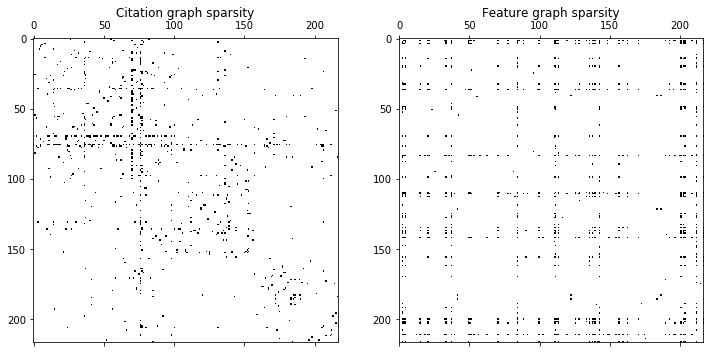

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].set_title('Citation graph sparsity')
axes[0].spy(A_citation);
axes[1].set_title('Feature graph sparsity')
axes[1].spy(A_feature_pruned);

Let $C_{k}(i,j)$ denote the number of paths of length $k$ from node $i$ to node $j$. 

We define the path matrix $P$, with entries
$ P_{ij} = \displaystyle\sum_{k=0}^{N}C_{k}(i,j). $

Calculate the path matrices for both the citation and the unpruned feature graphs for $N =10$.  

**Hint:** Use [powers of the adjacency matrix](https://en.wikipedia.org/wiki/Adjacency_matrix#Matrix_powers).

In [24]:
path_matrix_citation = sum([np.linalg.matrix_power(A_citation, k) for k in range(11)])# Your code here.
path_matrix_feature = sum([np.linalg.matrix_power(A_feature, k) for k in range(11)])# Your code here.

Check the sparsity pattern for both of path matrices.

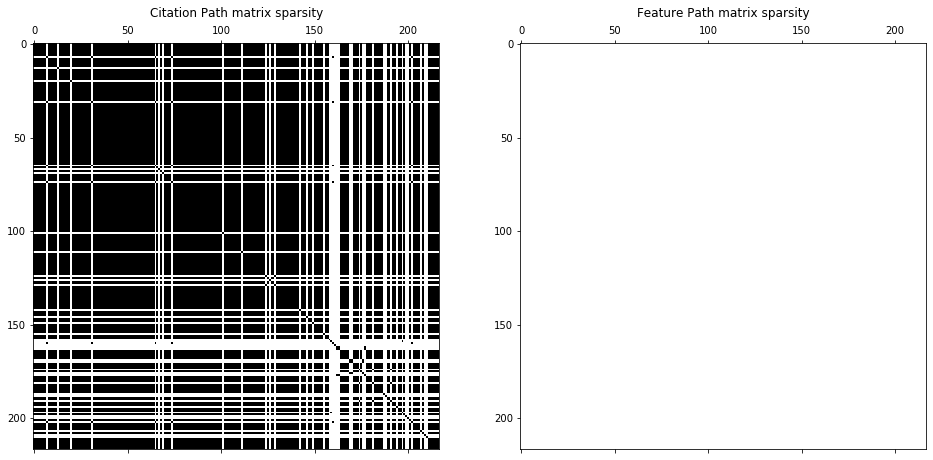

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(16, 9))
axes[0].set_title('Citation Path matrix sparsity')
axes[0].spy(path_matrix_citation);
axes[1].set_title('Feature Path matrix sparsity')
axes[1].spy(path_matrix_feature);

Now calculate the path matrix of the pruned feature graph for $N=10$. Plot the corresponding sparsity pattern. Is there any difference?

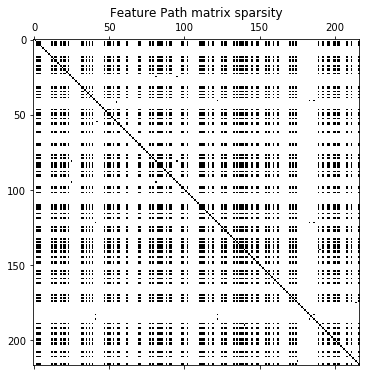

In [26]:
path_matrix_pruned = sum([np.linalg.matrix_power(A_feature_pruned, k) for k in range(11)])# Your code here.

plt.figure(figsize=(12, 6))
plt.title('Feature Path matrix sparsity')
plt.spy(path_matrix_pruned);

**Your answer here:**
There is difference. When $N=10$, for unpruned feature graph, each entry of the path matrix $P$ is positive, while for pruned feature graph, there are still some entries of path matrix equal to zero.

Describe how you can use the above process of counting paths to determine whether a graph is connected or not. Is the original (unpruned) feature graph connected?

**Your answer here:** 
If there exists an $N<\infty$ such that each entry of path matrix $P$ ($P_{ij} = \displaystyle\sum_{k=0}^{N}C_{k}(i,j)$) is greater than 0, then the graph is connected. The original (unpruned) feature graph is connected, since when $N=10$, all entries of path matrix $P$ is greater than 0.

If the graph is connected, how can you guess its diameter using the path matrix?

**Your answer here:**
Start with N = 0, calculate the path matrix $P$. Keep increasing the N until get path matrix $P$ with all entries greater than 0. This $N$ is the graph diameter.

If any of your graphs is connected, calculate the diameter using that process.

In [27]:
def calculate_diameter(adjacent_matrix):
    path_matrix = np.linalg.matrix_power(adjacent_matrix, 0)
    n = 0
    while(path_matrix.size != np.count_nonzero(path_matrix)):
        n += 1
        path_matrix += np.linalg.matrix_power(adjacent_matrix, n)
    return n

diameter = calculate_diameter(A_feature) # Your code here.
print(f"The diameter is: {diameter}")

The diameter is: 2


Check if your guess was correct using [NetworkX](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.distance_measures.diameter.html).
Note: usage of NetworkX is only allowed in this part of Section 1.

In [28]:
import networkx as nx
feature_graph = nx.from_numpy_matrix(A_feature)
print(f"Diameter according to networkx: {nx.diameter(feature_graph)}")

Diameter according to networkx: 2


## Section 2: Network Models

In this section, you will analyze the feature and citation graphs you constructed in the previous section in terms of the network model types.
For this purpose, you can use the NetworkX libary imported below.

In [29]:
import networkx as nx

Let us create NetworkX graph objects from the adjacency matrices computed in the previous section.

In [30]:
G_citation = nx.from_numpy_matrix(A_citation)
print('Number of nodes: {}, Number of edges: {}'. format(G_citation.number_of_nodes(), G_citation.number_of_edges()))
print('Number of self-loops: {}, Number of connected components: {}'. format(G_citation.number_of_selfloops(), nx.number_connected_components(G_citation)))

Number of nodes: 217, Number of edges: 409
Number of self-loops: 0, Number of connected components: 28


In the rest of this assignment, we will consider the pruned feature graph as the feature network.

In [31]:
G_feature = nx.from_numpy_matrix(A_feature_pruned)
print('Number of nodes: {}, Number of edges: {}'. format(G_feature.number_of_nodes(), G_feature.number_of_edges()))
print('Number of self-loops: {}, Number of connected components: {}'. format(G_feature.number_of_selfloops(), nx.number_connected_components(G_feature)))

Number of nodes: 217, Number of edges: 461
Number of self-loops: 0, Number of connected components: 136


### Question 4: Simulation with Erdős–Rényi and Barabási–Albert models

Create an Erdős–Rényi and a Barabási–Albert graph using NetworkX to simulate the citation graph and the feature graph you have. When choosing parameters for the networks, take into account the number of vertices and edges of the original networks.

The number of nodes should exactly match the number of nodes in the original citation and feature graphs.

In [32]:
assert len(G_citation.nodes()) == len(G_feature.nodes())
n = len(G_citation.nodes())
n

217

The number of match shall fit the average of the number of edges in the citation and the feature graph.

In [33]:
m = np.round((G_citation.size() + G_feature.size()) / 2)
m

435.0

How do you determine the probability parameter for the Erdős–Rényi graph?

**Your answer here:**
The number of nodes is $n$, then the number of edges in the fully connected graph should be $\frac{n(n-1)}{2}$. But actually the average number of edges in citation and feature graph is $m$, so the actual ratio of average number of edges to the edges of fully connected graph is
\begin{equation*}
\frac{2m}{n(n-1)}
\end{equation*}

In [34]:
p = (2*m)/(n*(n-1))# Your code here.
G_er = nx.erdos_renyi_graph(n, p)

Check the number of edges in the Erdős–Rényi graph.

In [35]:
print('My Erdos-Rényi network that simulates the citation graph has {} edges.'.format(G_er.size()))

My Erdos-Rényi network that simulates the citation graph has 449 edges.


How do you determine the preferential attachment parameter for Barabási–Albert graphs?

**Your answer here:**
As the preferential attachment means the ability of a new node to receive new links, we use the average degree of a node to decide this parameter. By using handshake lemma to get the total degrees in the graph, the preferential attachment parameter here is computed by 
\begin{equation*}
\frac{2m}{n}
\end{equation*}

In [36]:
q = (int)(np.floor((2*m)/n)) # Your code here.
G_ba = nx.barabasi_albert_graph(n, q)

Check the number of edges in the Barabási–Albert graph.

In [37]:
print('My Barabási-Albert network that simulates the citation graph has {} edges.'.format(G_ba.size()))

My Barabási-Albert network that simulates the citation graph has 852 edges.


### Question 5: Giant Component

Check the size of the largest connected component in the citation and feature graphs.

In [38]:
Gcc_citation = sorted(nx.connected_component_subgraphs(G_citation), key=len, reverse=True)
giant_citation = Gcc_citation[0]# Your code here.
print('The giant component of the citation graph has {} nodes and {} edges.'.format(giant_citation.number_of_nodes(), giant_citation.size()))

The giant component of the citation graph has 177 nodes and 394 edges.


In [39]:
Gcc_feature = sorted(nx.connected_component_subgraphs(G_feature), key=len, reverse=True)
giant_feature = Gcc_feature[0]# Your code here.
print('The giant component of the feature graph has {} nodes and {} edges.'.format(giant_feature.number_of_nodes(), giant_feature.size()))

The giant component of the feature graph has 74 nodes and 450 edges.


Check the size of the giant components in the generated Erdős–Rényi graph.

In [40]:
Gcc_er = sorted(nx.connected_component_subgraphs(G_er), key=len, reverse=True)
giant_er = Gcc_er[0]# Your code here.
print('The giant component of the Erdos-Rényi network has {} nodes and {} edges.'.format(giant_er.number_of_nodes(), giant_er.size()))

The giant component of the Erdos-Rényi network has 215 nodes and 449 edges.


Let us match the number of nodes in the giant component of the feature graph by simulating a new Erdős–Rényi network.
How do you choose the probability parameter this time? 

**Hint:** Recall the expected giant component size from the lectures.

**Your answer here:**
Our expected giant component size here are about 74, then the fraction of nodes in the GC $S=\frac{74}{217}$. We can use the following equation
\begin{align}
S = 1 - e^{-\langle k \rangle S} \\
\langle k \rangle = -\frac{\ln{(1 - S)}}{S}
\end{align}
to compute the average degree <$k$>  in the Erdős–Rényi network. After that, by using
\begin{align}
\langle k \rangle = p(N-1) \\
p = \frac{\langle k \rangle}{N-1}
\end{align}
we could compute out the probability $p$ of this new network.

In [41]:
S = giant_feature.number_of_nodes() / n
average_k = (-1)*(np.log(1-S))/S
average_k

1.2229789317821602

In [42]:
p_new = average_k/(n-1)# Your code here.
G_er_new = nx.erdos_renyi_graph(n, p_new)

Check the size of the new Erdős–Rényi network and its giant component.

In [891]:
print('My new Erdos Renyi network that simulates the feature graph has {} edges.'.format(G_er_new.size()))
Gcc_er = sorted(nx.connected_component_subgraphs(G_er_new), key=len, reverse=True)
giant_er_new = Gcc_er[0]# Your code here.
print('The giant component of the new Erdos-Rényi network has {} nodes and {} edges.'.format(giant_er_new.number_of_nodes(), giant_er_new.size()))

My new Erdos Renyi network that simulates the feature graph has 128 edges.
The giant component of the new Erdos-Rényi network has 74 nodes and 76 edges.


### Question 6: Degree Distributions

Recall the degree distribution of the citation and the feature graph.

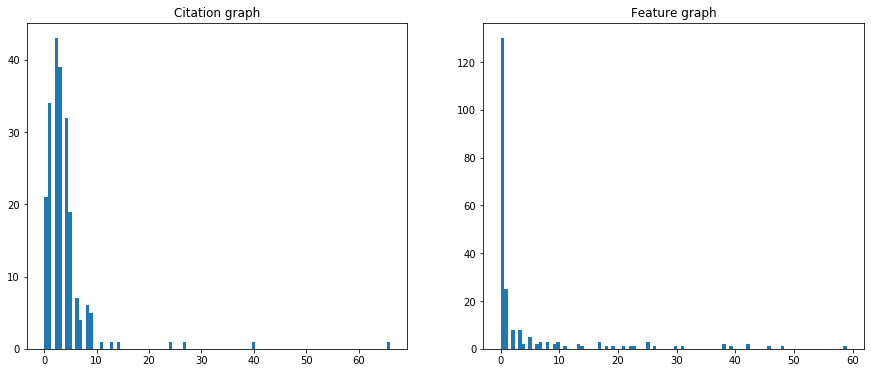

In [86]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].set_title('Citation graph')
citation_degrees = sorted([d for n, d in G_citation.degree])
axes[0].hist(citation_degrees, bins=100);
axes[1].set_title('Feature graph')
feature_degrees = sorted([d for n, d in G_feature.degree])
axes[1].hist(feature_degrees, bins=100);

What does the degree distribution tell us about a network? Can you make a prediction on the network model type of the citation and the feature graph by looking at their degree distributions?

**Your answer here:** The degree distribution tells about the characterization of the network. The random network's degree distribution follows a poisson distribution, where most nodes have the same number of nodes, and the scale-free network follows the power law. The citation graph's degree distribution looks more like a poisson distribution, thus it should be a random network with few hubs. The feature graph does has a longer tail with a lot more hubs, thus it should be a scale-free network.

Now, plot the degree distribution historgrams for the simulated networks.

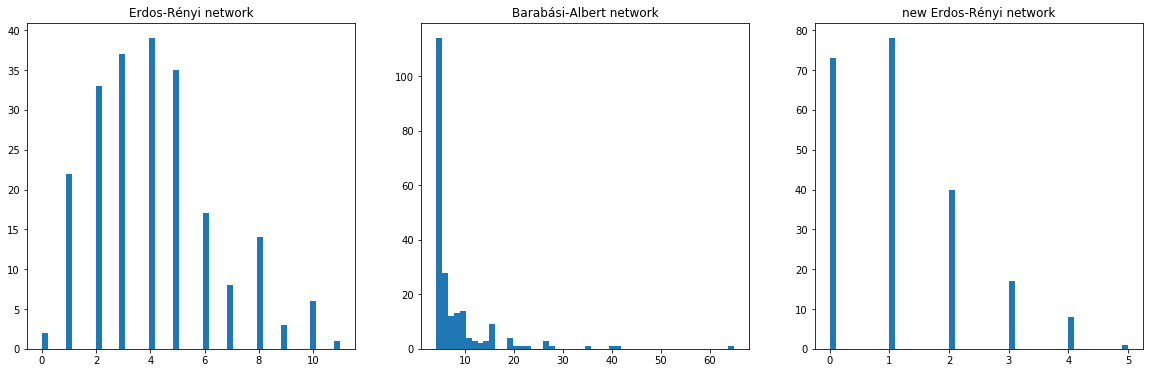

In [52]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
axes[0].set_title('Erdos-Rényi network')
er_degrees = [d for n, d in G_er.degree()]
axes[0].hist(er_degrees, bins=50);
axes[1].set_title('Barabási-Albert network')
ba_degrees = [d for n, d in G_ba.degree()]
axes[1].hist(ba_degrees, bins=50);
axes[2].set_title('new Erdos-Rényi network')
er_new_degrees = [d for n, d in G_er_new.degree()]
axes[2].hist(er_new_degrees, bins=50);

In terms of the degree distribution, is there a good match between the citation and feature graphs and the simulated networks?
For the citation graph, choose one of the simulated networks above that match its degree distribution best. Indicate your preference below.

**Your answer here:** There seems to have a good match between the Erdos-Rényi network and citation graph, which models a random network. This network is situated in the same interval as the citation graph and has the peak at the same place. If we had fewer bins, then Barabási-Albert network resembles the most to the citation graph, but it models more hubs than existing and the peak is at the wrong place. The new Barabási Erdos-Rényi also follows a poisson distribution but the interval is much smaller and the peak is at the wrong place. For the feature graph, I think that Barabási Erdos-Rényi is the most similar (both models scale-free network).

You can also simulate a network using the configuration model to match its degree disctribution exactly. Refer to [Configuration model](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.degree_seq.configuration_model.html#networkx.generators.degree_seq.configuration_model).

Let us create another network to match the degree distribution of the feature graph. 

In [56]:
G_config = nx.configuration_model(feature_degrees.astype(int)) 
print('Configuration model has {} nodes and {} edges.'.format(G_config.number_of_nodes(), G_config.size()))

Configuration model has 217 nodes and 8945 edges.


Does it mean that we create the same graph with the feature graph by the configuration model? If not, how do you understand that they are not the same?

**Your answer here:** We did not necessarily created the same graph with the configuration model. Indeed, there are the same amount of edges and nodes, and each node has the required degree. However, as the configuration model assigns random edges to match the node degrees, thus it is very possible that the edge links are scrambled and the nodes are not linked to the correct  neighbors.

### Question 7: Clustering Coefficient

Let us check the average clustering coefficient of the original citation and feature graphs. 

In [53]:
nx.average_clustering(G_citation)

0.2653995547704225

In [54]:
nx.average_clustering(G_feature)

0.24478719794037188

What does the clustering coefficient tell us about a network? Comment on the values you obtain for the citation and feature graph.

**Your answer here:** The clustering coefficient describes the density of the graph, the trend that nodes tend to cluster together. Both graphs has similar clustering coefficients that are small, however G_feature have a lot more connected components than G_citation. Perhaps it is better to look at the local clustering coefficient rather than the global average clustering coefficient to see the difference between the 2 graphs.

Now, let us check the average clustering coefficient for the simulated networks.

In [160]:
nx.average_clustering(G_er)

0.014274742154926492

In [161]:
nx.average_clustering(G_ba)

0.10721433592671167

In [198]:
nx.average_clustering(nx.Graph(G_config))

0.4265874172836106

Comment on the values you obtain for the simulated networks. Is there any good match to the citation or feature graph in terms of clustering coefficient?

**Your answer here:** None of the three is a very good match to the citation graph or the feature graph. Among the three network, G_er seems to have the least components clustered together, where as G_config seems to have the most of components clustered together.

Check the other [network model generators](https://networkx.github.io/documentation/networkx-1.10/reference/generators.html) provided by NetworkX. Which one do you predict to have a better match to the citation graph or the feature graph in terms of degree distribution and clustering coefficient at the same time? Justify your answer.

**Your answer here:** As feature graph resembles to scale-free graph which follows a power law, we think that the powerlaw_cluster_graph resembles the most the feature graph in terms of degree distribution. We assigned the averge clustering of G_feature graph to the parameter p - probability of adding a triangle after adding a random edge - of the powerlaw cluster graph, because we think that the definition of p is very similar to the definition of clustering coefficient.

If you find a better fit, create a graph object below for that network model. Print the number of edges and the average clustering coefficient. Plot the histogram of the degree distribution.

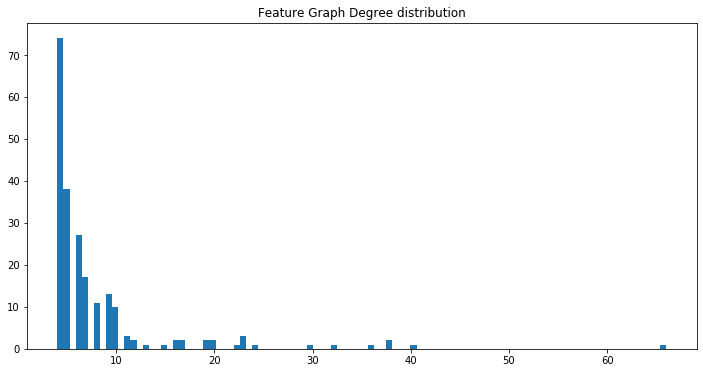

In [103]:
G_pl = nx.powerlaw_cluster_graph(n, q, nx.average_clustering(G_feature))
plt.figure(figsize=(12, 6))
plt.title('Feature Graph Degree distribution')
pl_degrees = [d for n, d in G_pl.degree()]
plt.hist(pl_degrees, bins=100);

In [104]:
nx.average_clustering(nx.Graph(G_pl))

0.20912369536258302

Comment on the similarities of your match.

**Your answer here:** As wee can see, both graph follows a power law distribution, as there are formation of large hubs and most of the node has a very small (less than 10) degree. The peak of the real feature graph is higher (more than 120), as there are more nodes in the power law graph (vs in original graph) that has a degree larger than 1. Indeed, in the original graph, we can see that the peak is the closer to 0. We can also see that the clustering coefficient is close.